Задание 1.Выберите произвольное начальное состояние и смоделируйте 20000 последующих состояний в цепи Маркова с введенной выше матрицей переходов. Результат моделирования (массив размера 20000) запишите в переменную states

In [1]:
import numpy as np
import random as rm

In [4]:
state_wheather = ("sunny", "cloudy", "rainy")

In [5]:
transitionMatrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))
transitionName = [["ss","sc","sr"],
                  ["cs","cc","cr"],
                  ["rs","rc","rr"]]

In [6]:
weather = "sunny"
state = [weather]
prob = 1
for i in range(1,20001):
    if weather == "sunny":
        change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
        if change == "ss":
            prob = prob * 0.6
            state.append("sunny")
            pass
        elif change == "sr":
            prob = prob * 0.1
            weather = "rainy"
            state.append("rainy")
        else:
            prob = prob * 0.3
            weather = "cloudy"
            state.append("cloudy")
    elif weather == "cloudy":
        change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
        if change == "cc":
            prob = prob * 0.4
            state.append("cloudy")
            pass
        elif change == "cs":
            prob = prob * 0.3
            weather = "sunny"
            state.append("sunny")
        else:
            prob = prob * 0.3
            weather = "rainy"
            state.append("rainy")
    elif weather == "rainy":
        change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
        if change == "rr":
            prob = prob * 0.5
            state.append("rainy")
            pass
        elif change == "rs":
            prob = prob * 0.2
            weather = "sunny"
            state.append("sunny")
        else:
            prob = prob * 0.3
            weather = "cloudy"
            state.append("cloudy")   
print(state)

['sunny', 'cloudy', 'cloudy', 'cloudy', 'sunny', 'cloudy', 'cloudy', 'sunny', 'sunny', 'cloudy', 'rainy', 'rainy', 'cloudy', 'cloudy', 'sunny', 'rainy', 'rainy', 'rainy', 'cloudy', 'cloudy', 'cloudy', 'rainy', 'cloudy', 'cloudy', 'rainy', 'rainy', 'rainy', 'cloudy', 'sunny', 'cloudy', 'cloudy', 'cloudy', 'rainy', 'rainy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'rainy', 'sunny', 'rainy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'rainy', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'rainy', 'rainy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'rainy', 'rainy', 'sunny', 'sunny', 'sunny', 'cloudy', 'rainy', 'rainy', 'rainy', 'sunny', 'cloudy', 'sunny', 'sunny', 'sunny', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'rainy', 'rainy', 'rainy', 'rainy', 'cloudy', 'rainy', 'cloudy', 'rainy', 'rainy', 'cloudy', 'cloudy', 'rainy', 'rainy', 'rainy', 'cloudy', 'sunny', 'cloudy'

Задание 2. На основе массива states рассчитайте, как меняется частота встречаемости каждого из типов погоды в массиве states[:n] для n, возрастающих от 1 до 20000. На одном рисунке покажите 3 графика: по оси х откладывайте n, по у - частоту для каждого из трех типов погоды.

In [7]:
from collections import Counter

In [8]:
Sun =[]
Cloud =[]
Rain =[]
for j in range(1, 20001):
    A= Counter(state[0:j])
    Sunny = A["sunny"]/j
    Cloudy = A["cloudy"]/j
    Rainy = A["rainy"]/j
    Sun.append(Sunny)
    Cloud.append(Cloudy)
    Rain.append(Rainy)

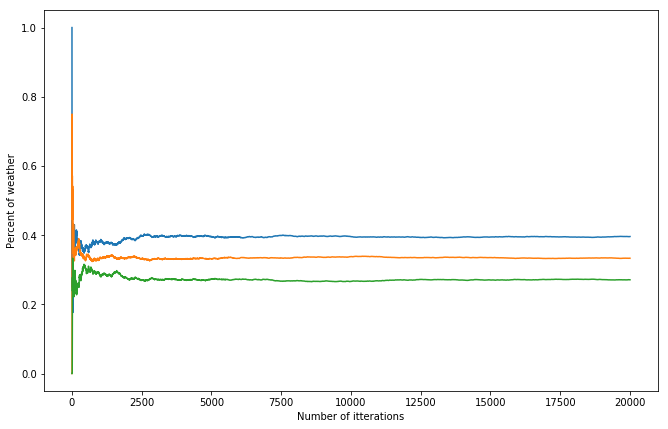

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,7))
plt.plot(Sun)
plt.plot(Cloud)
plt.plot(Rain)
plt.ylabel('Percent of weather')
plt.xlabel('Number of itterations')

plt.show()

Задание 3. Как следует из картинки, частоты сходятся к некоторым стационарным значениям. Убедитесь, что эти значения совпадают с решением уравнения на стационарную плотность πP=π, где P - это матрица переходных вероятностей (transition_matrix), а вектор π - искомая стационарная плотность. Дополнительно убедитесь, это этот же вектор возникает в строках матрицы P, при возведении ее во все большие степени.

In [11]:
C = Counter(state)
print(C)
A1 = C["sunny"]/20000
A2 = C["cloudy"]/20000
A3 = C["rainy"]/20000
list = [A1,A2,A3]
Pi = np.array(list)
print(Pi)
np.dot(Pi,transitionMatrix)


Counter({'sunny': 7919, 'cloudy': 6664, 'rainy': 5418})
[0.39595 0.3332  0.2709 ]


array([0.39171 , 0.333335, 0.275005])

Векор Pi умноженный на transitionMatrix как видно из вычисления для 20000(для других n получим близкий результат, это следует из графика), действительно ~Pi.

In [37]:
A = transitionMatrix
for i in range(1,25):
    A = np.dot(A,transitionMatrix)
    print(A)

[[0.47 0.33 0.2 ]
 [0.36 0.34 0.3 ]
 [0.31 0.33 0.36]]
[[0.421 0.333 0.246]
 [0.378 0.334 0.288]
 [0.357 0.333 0.31 ]]
[[0.4017 0.3333 0.265 ]
 [0.3846 0.3334 0.282 ]
 [0.3761 0.3333 0.2906]]
[[0.39401 0.33333 0.27266]
 [0.38718 0.33334 0.27948]
 [0.38377 0.33333 0.2829 ]]
[[0.390937 0.333333 0.27573 ]
 [0.388206 0.333334 0.27846 ]
 [0.386841 0.333333 0.279826]]
[[0.3897081 0.3333333 0.2769586]
 [0.3886158 0.3333334 0.2780508]
 [0.3880697 0.3333333 0.278597 ]]
[[0.38921657 0.33333333 0.2774501 ]
 [0.38877966 0.33333334 0.277887  ]
 [0.38856121 0.33333333 0.27810546]]
[[0.38901996 0.33333333 0.27764671]
 [0.3888452  0.33333333 0.27782147]
 [0.38875782 0.33333333 0.27790885]]
[[0.38894132 0.33333333 0.27772535]
 [0.38887141 0.33333333 0.27779525]
 [0.38883646 0.33333333 0.27783021]]
[[0.38890986 0.33333333 0.27775681]
 [0.3888819  0.33333333 0.27778477]
 [0.38886792 0.33333333 0.27779875]]
[[0.38889728 0.33333333 0.27776939]
 [0.38888609 0.33333333 0.27778057]
 [0.3888805  0.33333333 0.2

С ростом степени строки матрицы действительно становятся похожими на наш вектор.

Задание 4. Примените алгоритм Metropolis для генерации выборки из смеси двух гауссиан. Плотность смеси задается в виде p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.

In [22]:
from scipy.stats import norm



In [15]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

In [19]:
value = lambda x: 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
proposal = lambda x: (x + np.random.choice([-1, 1])+10) % 20 -10
post = metroplis(1, value, proposal, 10000);

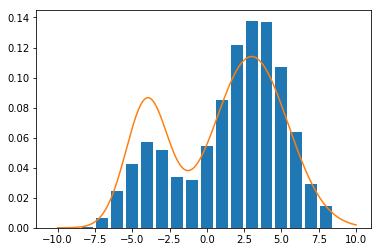

In [34]:
plt.hist(post, bins=np.arange(-10,10)- 0.5 , rwidth=0.8, density=True)
x = np.linspace(-10, 10, 10000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
plt.plot(x,y)
plt.show()



Получилось похоже , ну почти)